## 0. Import Packages

In [5]:
import tensorflow.compat.v1 as tf
print(tf.__version__)
import numpy as np
import tensorflow.compat.v1 as tf

2.3.0


In [7]:
node1 = tf.constant(3.0, dtype=tf.float32)
node2 = tf.constant(4.0) 
print(node1, node2)

tf.Tensor(3.0, shape=(), dtype=float32) tf.Tensor(4.0, shape=(), dtype=float32)


In [8]:
with tf.Session() as sess:
    node1 = tf.constant(3.0, dtype=tf.float32)
    node2 = tf.constant(4.0) 
    print(sess.run([node1, node2]))

[3.0, 4.0]


In [9]:
with tf.Session() as sess:
    node3 = node1 + node2
    print(node3)
    print(sess.run(node3))  ## need

Tensor("add:0", shape=(), dtype=float32)
7.0


In [12]:
with tf.Session() as sess:
    a = tf.placeholder(tf.float32)
    b = tf.placeholder(tf.float32)
    adder_node = a + b
    print(sess.run(adder_node, feed_dict={a: 3, b: 4.5}))
    print(sess.run(adder_node, {a: [1, 3], b: [2, 4]}))

7.5
[3. 7.]


In [14]:
with tf.Session() as sess:
    W = tf.Variable([3.0], dtype=tf.float32)  # Variable : changeable during training
    b = tf.Variable([-3.0], dtype=tf.float32)
    x = tf.placeholder(tf.float32)

    H = W*x+b

    init = tf.global_variables_initializer()
    sess.run(init)

    print(sess.run(H, {x:3}))

[6.]


In [15]:
with tf.Session() as sess:
    print(sess.run(tf.square([1., 2., 3., 4.])))
    print(sess.run(tf.reduce_mean([1., 2., 3., 4.])))

[ 1.  4.  9. 16.]
2.5


## 2. Linear Regression

In [18]:
x_data = [1, 2, 3]
y_data = [4.1, 6.9, 9.9]

with tf.Session() as sess:
    W = tf.Variable([.0], dtype=tf.float32)
    b = tf.Variable([.0], dtype=tf.float32)

    x = tf.placeholder(tf.float32)
    y = tf.placeholder(tf.float32)
    a = 0.05 # learning rate
    H = W*x + b
    cost = tf.reduce_mean(tf.square(H - y)) # cost

    optimizer = tf.train.GradientDescentOptimizer(a) 
    train = optimizer.minimize(cost) 

    init = tf.global_variables_initializer()
    sess.run(init)

    for i in range(20):
        sess.run(train,  {x: x_data, y: y_data})

    print('Score Prediction:', sess.run(H, {x: 4}))    


Score Prediction: [12.712172]


## 3. Multi-Variable Linear regression

In [20]:
x_data = [[30, 1, 5], [20, 2, 10], [40, 3, 15]]
y_data = [[6.1], [3.1], [6.8]]

with tf.Session() as sess:
    W = tf.Variable([[.0], [.0], [.0]], dtype=tf.float32)
    b = tf.Variable([.0], dtype=tf.float32)

    x = tf.placeholder(shape=[None, 3], dtype=tf.float32)
    y = tf.placeholder(shape=[None, 1], dtype=tf.float32)
    a = 1e-4  
    H = tf.matmul(x, W) + b 
    
    cost = tf.reduce_mean(tf.square(H - y)) 
    optimizer = tf.train.GradientDescentOptimizer(a) 
    train = optimizer.minimize(cost) 

    sess = tf.Session()
    init = tf.global_variables_initializer()
    sess.run(init)

    for t in range(1000):
        sess.run(train,  {x: x_data, y: y_data})
        if t % 100 == 0:
            c = sess.run(cost, {x: x_data, y: y_data})
            print('Iteration:', t, 'Cost:', c)

    print('')
    x_test = [[25, 2, 10]]

    print('Price Prediction:', sess.run(H, {x: x_test}))    

Iteration: 0 Cost: 19.306734
Iteration: 100 Cost: 0.33918408
Iteration: 200 Cost: 0.20973368
Iteration: 300 Cost: 0.12994206
Iteration: 400 Cost: 0.08075841
Iteration: 500 Cost: 0.050441224
Iteration: 600 Cost: 0.031752724
Iteration: 700 Cost: 0.02023192
Iteration: 800 Cost: 0.013128984
Iteration: 900 Cost: 0.008749183

Price Prediction: [[4.215914]]


- tf.cast() : Change data type

In [21]:
with tf.Session() as sess:
  print(2 > 5)
  print(sess.run(tf.cast(2 > 5, dtype=tf.float32)))
  print(sess.run(tf.cast(2 < 5, dtype=tf.float32)))

False
0.0
1.0


## 4. Logistic Regression

0.6931472 Accuracy:  0.6666667
0.59083295 Accuracy:  1.0
0.51551753 Accuracy:  1.0
0.4581236 Accuracy:  1.0
0.41337994 Accuracy:  1.0
0.3776822 Accuracy:  1.0
0.3485788 Accuracy:  1.0
0.32438615 Accuracy:  1.0
0.30392882 Accuracy:  1.0
0.28637055 Accuracy:  1.0
Prediction: [ True]


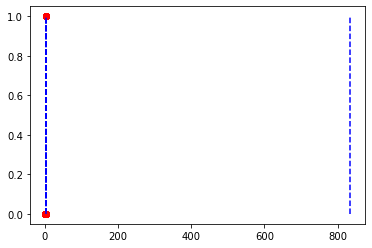

In [1]:
x_data = [1, 2, 3]
y_data = [0, 0, 1]

with tf.Session() as sess:
    W = tf.Variable([.0], dtype=tf.float32)
    b = tf.Variable([.0], dtype=tf.float32)

    x = tf.placeholder(tf.float32)
    y = tf.placeholder(tf.float32)
    a = 0.05  
    H = tf.nn.sigmoid(W*x + b)
    cost = - tf.reduce_mean(y * tf.log(H) + (1 - y) * tf.log(1 - H))  

    optimizer = tf.train.GradientDescentOptimizer(a) 
    train = optimizer.minimize(cost) 

  
    predicted = tf.cast(H > 0.5, dtype=tf.float32)
    accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, y), dtype=tf.float32))

    sess = tf.Session()
    init = tf.global_variables_initializer()
    sess.run(init)

    for i in range(1000):
        c, acc, _ = sess.run([cost, accuracy, train],  {x: x_data, y: y_data})
        if i % 100 == 0:
            print(c, "Accuracy: ", acc)
            W1, b1 = sess.run([W, b],  {x: x_data, y: y_data})
            plt.plot([1, 2, 3], [0, 0, 1], "ro")
            plt.plot([-b1/(W1+1e-5), -b1/(W1+1e-5)], [0, 1], "b--") 
          
          
    print('Prediction:', sess.run(H, {x: 4}) > 0.5) 

## 5. Multi-Variable Logistic Regression

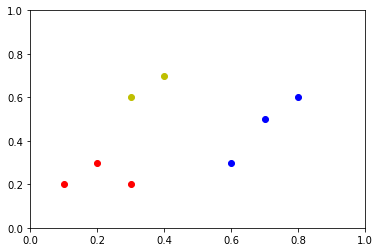

In [2]:
x_data1 = [[0.1, 0.2], [0.2, 0.3], [0.3, 0.2]]
x_data2 = [[0.6, 0.3], [0.7, 0.5], [0.8, 0.6]]
x_data3 = [[0.3, 0.6], [0.4, 0.7]]
for i in range(len(x_data1)):
    plt.plot(x_data1[i][0], x_data1[i][1], "ro")
for i in range(len(x_data2)):
    plt.plot(x_data2[i][0], x_data2[i][1], "bo")  
for i in range(len(x_data3)):
    plt.plot(x_data3[i][0], x_data3[i][1], "yo")
    
plt.axis([0, 1, 0, 1])
plt.show()

In [3]:
x_data = [[0.1, 0.2], [0.2, 0.3], [0.3, 0.2], [0.6, 0.3], 
 [0.7, 0.5], [0.8, 0.6], [0.3, 0.6], [0.4, 0.7]]
y_data = [[1, 0, 0], [1, 0, 0], [1, 0, 0], [0, 1, 0], [0, 1, 0], 
 [0, 1, 0], [0, 0, 1], [0, 0, 1]]

with tf.Session() as sess:
    x = tf.placeholder(shape=[None, 2], dtype=tf.float32)
    y = tf.placeholder(shape=[None, 3], dtype=tf.float32)

    W = tf.Variable(tf.zeros([2, 3], tf.float32))
    b = tf.Variable(tf.zeros([3], tf.float32))

    a = 0.05 
    H = tf.nn.softmax(tf.matmul(x, W) + b)
    cost = tf.reduce_mean(-tf.reduce_sum(y * tf.log(H), axis=1)) 

    optimizer = tf.train.GradientDescentOptimizer(a) 
    train = optimizer.minimize(cost) 
                
    predicted = tf.equal(tf.argmax(H,1), tf.argmax(y,1))
    accuracy = tf.reduce_mean(tf.cast(predicted, tf.float32))                

    sess = tf.Session()
    init = tf.global_variables_initializer()
    sess.run(init)

    for i in range(2000):
        c, acc, _ = sess.run([cost, accuracy, train],
                                  {x: x_data, y: y_data})
        if i % 200 == 0:
            print("Cost: ", c, "Accuracy: ", acc)
          
    W2, b2 = sess.run([W, b],  {x: x_data, y: y_data})
    print(W2, b2)

Cost:  1.0986123 Accuracy:  0.375
Cost:  0.89973646 Accuracy:  0.75
Cost:  0.7639026 Accuracy:  0.875
Cost:  0.65993834 Accuracy:  1.0
Cost:  0.5784094 Accuracy:  1.0
Cost:  0.51309365 Accuracy:  1.0
Cost:  0.45981526 Accuracy:  1.0
Cost:  0.4156879 Accuracy:  1.0
Cost:  0.378658 Accuracy:  1.0
Cost:  0.34722656 Accuracy:  1.0
[[-3.144557    4.7928476  -1.6482903 ]
 [-3.043951   -0.61668676  3.6606388 ]] [ 2.593781  -1.6229787 -0.9708057]


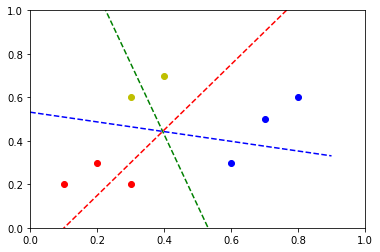

In [6]:
x_data1 = [[0.1, 0.2], [0.2, 0.3], [0.3, 0.2]]
x_data2 = [[0.6, 0.3], [0.7, 0.5], [0.8, 0.6]]
x_data3 = [[0.3, 0.6], [0.4, 0.7]]

for i in range(len(x_data1)):
    plt.plot(x_data1[i][0], x_data1[i][1], "ro")
for i in range(len(x_data2)):
    plt.plot(x_data2[i][0], x_data2[i][1], "bo")  
for i in range(len(x_data3)):
    plt.plot(x_data3[i][0], x_data3[i][1], "yo")   
    
W2 = [[-3.14455724,  4.79284668, -1.64829016],
 [-3.04395127, -0.61668688,  3.66063857]]
b2 = [ 2.59378099, -1.62297833, -0.97080582]

x1 = np.linspace(0,0.9, 20)

plt.plot(x1,(W2[0][1]-W2[0][0])/(W2[1][0]-W2[1][1])*x1+
         (b2[1]-b2[0])/(W2[1][0]-W2[1][1]), "g--") 
plt.plot(x1,(W2[0][2]-W2[0][0])/(W2[1][0]-W2[1][2])*x1+
         (b2[2]-b2[0])/(W2[1][0]-W2[1][2]), "b--") 
plt.plot(x1,(W2[0][1]-W2[0][2])/(W2[1][2]-W2[1][1])*x1+
         (b2[1]-b2[2])/(W2[1][2]-W2[1][1]), "r--") 
plt.axis([0, 1, 0, 1])
plt.show()    

## 6. XOR

In [7]:
x_data = [[0., 0.], [1., 0.], [0., 1.], [1., 1.]]
y_data = [[1., 0.], [0., 1.], [0., 1.], [1., 0.]]

with tf.Session() as sess:
    W = tf.Variable(tf.zeros([2, 2], tf.float32))
    b = tf.Variable(tf.zeros([2], tf.float32))

    x = tf.placeholder(shape=[None, 2], dtype=tf.float32)
    y = tf.placeholder(shape=[None, 2], dtype=tf.float32)

    a = 0.01 
    H = tf.nn.softmax(tf.matmul(x, W) + b)
    cost = tf.reduce_mean(-tf.reduce_sum(y * tf.log(H), axis=1)) #비용함수

    optimizer = tf.train.GradientDescentOptimizer(a) 
    train = optimizer.minimize(cost) 
                
    predicted = tf.equal(tf.argmax(H,1), tf.argmax(y,1))
    accuracy = tf.reduce_mean(tf.cast(predicted, tf.float32))                

    sess = tf.Session()
    init = tf.global_variables_initializer()
    sess.run(init)

    for i in range(20000):
        W1, b1, c, acc, _ = sess.run([W, b, cost, accuracy, train],
                                  {x: x_data, y: y_data})
        if i % 2000 == 0:
            print("Cost: ", c, ", Accuracy: ", acc, W1, b1)

Cost:  0.6931472 , Accuracy:  0.5 [[0. 0.]
 [0. 0.]] [0. 0.]
Cost:  0.6931472 , Accuracy:  0.5 [[0. 0.]
 [0. 0.]] [0. 0.]
Cost:  0.6931472 , Accuracy:  0.5 [[0. 0.]
 [0. 0.]] [0. 0.]
Cost:  0.6931472 , Accuracy:  0.5 [[0. 0.]
 [0. 0.]] [0. 0.]
Cost:  0.6931472 , Accuracy:  0.5 [[0. 0.]
 [0. 0.]] [0. 0.]
Cost:  0.6931472 , Accuracy:  0.5 [[0. 0.]
 [0. 0.]] [0. 0.]
Cost:  0.6931472 , Accuracy:  0.5 [[0. 0.]
 [0. 0.]] [0. 0.]
Cost:  0.6931472 , Accuracy:  0.5 [[0. 0.]
 [0. 0.]] [0. 0.]
Cost:  0.6931472 , Accuracy:  0.5 [[0. 0.]
 [0. 0.]] [0. 0.]
Cost:  0.6931472 , Accuracy:  0.5 [[0. 0.]
 [0. 0.]] [0. 0.]
